In [9]:
import numpy as np
import matplotlib.pyplot as plt

In this homework assignment we will focus on estimation and uncertainty, making use of material from Chapters 6 and 7 from Kass, Eden, and Brown.

# The law of large numbers and the central limit theorem

Chapter 6 in the textbook introduces the law of large numbers (LLN) and the central limit theorem (CLT). Suppose that we draw some random variables $X_1, X_2, \ldots, X_n$ from some distribution with mean $\mu$ and compute the mean $\bar{X}$, which we expect to be close to but not exactly equal to the true mean $\mu$. The LLN and CLT state the following:

- **LLN**: The sample mean $\bar{X}$ approaches the true mean as $n$ increases.
- **CLT**: The distribution of $\bar{X}$ becomes normal as $n$ becomes large. This is true even if the distribution of $X$ isn't normal.

In what follows, we will illustrate these two important statistical principles using simulated data for the particular case of binomial distribution.

## The binomial distribution

Recall that a binomial distribution describes a sum of binary random variables, and the distribution is characterized by a single parameter $p$. Imagine that we have a (not necessarily fair) coin that comes up heads with probability $p$ and tails with probability $1-p$. We can do an "experiment" in which we flip the coin $n$ times and let $X_i = 1$ if it comes up heads or $X_i = 0$ if it comes up tails on the $i$th flip. We can say that $Y = \sum_{i=1}^n X_i$ is a random variable drawn from a binomial distribution $\mathcal{B}(n,p)$. 

## LLN for the binomial distribution

The true mean of the binomial distribution is $E(Y) = np$, and the LLN says that $Y$ should get closer and closer to this value as $n$ becomes larger. Our first problem will be to show that this is true by doing a numerical experiment with simulated data, like the coin flip experiment described above.

To begin, we need to figure out how to flip a coin in Python. We can do this using the function `np.random.rand()`, which returns a random value between 0 and 1. If $p$ is the probability that the coin comes up heads, we can simulate a coin flip by saying that the result is heads if `np.random.rand()` $< p$, and tails otherwise. (Think this through to make sure that it makes sense!) Then, if we want to generate a binomial random variable $Y \sim \mathcal{B}(n,p)$, we just need to do this $n$ times and add up the number of heads flips.

The code below shows an example of how this can be done. Since the probability of heads in this example is $p=0.8$ and we are doing 20 flips, we expect the number of heads, `y`, to be about 16:

In [10]:
p = 0.8
n = 20
y = 0
for i in range(n):
    if np.random.rand() < p:
        y += 1
        
print(y)

12


**Exercise 1**

Turn the above code into a function, `binomial(n,p)` that takes `n` and `p` as arguments and returns a binomial random variable. After writing this function, try printing the result of `binomial(20, 0.8)` and make sure that it gives a reasonable value as in the example above.

In [11]:
### Your code here ###


**Exercise 2**

Draw 10000 samples from the binomial distribution with $m=20$ and $p=0.8$ and plot a histogram of the results. Since the random variables are integers, make sure that each bin in the histogram has a width of 1.

**Note**: If you're not confident that you got the previous exercise correct, you can use the built-in function `np.random.binomial()` to generate binomial data in this and the following exercises.

In [12]:
### Your code here ###


The LLN says that we expect $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ to get closer and closer to its theoretical mean, $p$, as $n$ increases. For the binomial distribution, where $Y = \sum_{i=1}^n X_i$, this is the same as saying that $Y$ approaches $np$ as $n$ increases.

**Exercise 3**

Let `n_array = np.array([10, 100, 1000, 10000, 100000])` be an array of values of `n`. Use a `for` loop to print `n` along with $Y/n$ for each value of `n`, where $Y \sim \mathcal{B}(n,p)$ is a binomial random variable. Use $p=0.8$ as above. Do the values get closer to the true mean as `n` gets larger?

In [13]:
### Your code here ###


The above result is intuitive, but it isn't entirely satisfying since, due to randomness, it will give different values each time we run the code. What we really want to know is the *distribution* of $\bar{X}$ for each value of  $n$, since this would give us information about the amount of variability that the sample mean exhibits about the true mean. The CLT gives us this information.

## The CLT for the binomial distribution

According to the CLT, the distribution of $\bar{X}$ should become normal as $n$ becomes large. We can see this by plotting a histogram below, in this case with $n=500$.

We can notice two things:
1. The distribution looks much more like a normal distribution (i.e. a bell-shaped curve) than the original binomial distribution that we plotted above. This is the crucial point about the CLT: If $n$ is large, then distributions of *means* are normal, even if the distribution from which the data is drawn is not normal. This is very important to keep in mind with experimental data, where the CLT means that we can still know something about the distribution of means, even if we don't know the underlying distribution from which the data is drawn.
2. The distribution is very narrowly centered about the true mean, with a small standard deviation. This means that we can expect our estimates of $\bar{X}$ to be very similar if we run the experiment multiple times.

Text(0, 0.5, 'Count')

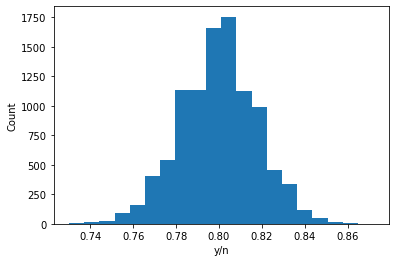

In [14]:
n = 500
n_samples = 10000
samples = np.zeros(n_samples)
for j in range(n_samples):
    samples[j] = np.random.binomial(n, 0.8)/n
    
plt.hist(samples, bins=20);
plt.xlabel('y/n')
plt.ylabel('Count')

Regarding the second point above, the full statement of the CLT actually explains this observation. According to the CLT, the distribution of means when $n$ is large is given by $\bar{X} \sim \mathcal{N} (\mu, \sigma^2/n)$, where $\mu$ and $\sigma^2$ are the mean and variance (squared standard deviation) of the distribution over $X$. For a binary variable, these are $\mu = p$ and $\sigma^2 = p(1-p)$. Notice that the variance in the distribution gets smaller as $n$ increases.

**Exercise 4**

Compute `samples` as above using the following values of `n`: 10, 100, 1000, and 10000. In each case, calculate and print the standard deviation of the values in `samples`, as well as the theoretical value for the standard deviation given above. The values should match to within a few percent. As before, use `n_samples` = 10000 and $p=0.8$.

In [15]:
### Your code here ###


# Maximum likelihood

When fitting a statistical model (for example, a normal distribution to describe a collection of data points, or a linear fit to describe the relation between two sets of data) to data, we want to optimize the parameters of the fit. Maximum likelihood (ML) gives us a way to do this. According to ML, we should write think of our data $x$ as coming from a probability distribution $p(x|\theta)$ that depends on parameter $\theta$ (which could be, for example, the mean $\mu$ or variance $\sigma^2$ in a normal distribution). The best value of $\theta$ is then the one that maximizes this probability distribution. In practice, we actually maximize $\ln(p(x|\theta))$ rather than $p(x|\theta)$ itself. We do this because it is easier mathematically, and, since the logarithm always increases when its argument increases, we can be sure that the $\theta$ that maximizes $p(x|\theta)$ will also maximize $\ln(p(x|\theta))$.

## ML for the normal distribution

In class, we noted that the probability of observing a data point $x_i$ from a normal distribution is 
$$
p(x_i | \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2\sigma^2}(x_i - \mu)^2},
$$
where $\mu$ and $\sigma$ are the parameters that were referred to as $\theta$ above. If we have lots of independent data points, then the probability of observing all of them is just the product of the individual probabilities:
$$
p(x_1, x_2, \ldots, x_n | \mu, \sigma) = \prod_{i=1}^n p(x_i | \mu, \sigma).
$$
Then, because the logarithm of a product is equal to the sum of logarithms, the above expression leads to the "log likelihood":
$$
\ln p(x_1, x_2, \ldots, x_n | \mu, \sigma) = \sum_{i=1}^n \ln p(x_i | \mu, \sigma)
= \sum_{i=1}^n \left[ - \ln(\sqrt{2\pi}\sigma) - \frac{(x_i - \mu)^2}{2 \sigma^2}\right].
$$
In class we showed that, by setting the derivative of this expression with respect to $\mu$ equal to zero, we could find the optimal value of $\mu$, which we called $\hat{\mu}$:
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i,
$$
which just says that the normal distribution should be centered at the mean of the data.

**Exercise 5 (calculation)**

Take the derivative of the above log likelihood with respect to $\sigma$ and set this derivative equal to zero in order to find the optimal value $\hat{\sigma}$. Before you begin, make a guess (just to yourself, no need to write it down) about what you expect the answer to be, then see whether your guess is right. As usual, you can either type your solution using LaTex notation below or submit it as a PDF file.

# Confidence intervals

Above we considered a coin flipping experiment with $n=10$ flips of a biased coin. If we count an occurrence of heads in flip $i$ as $X_i=1$ and tails as $X_i=0$, then the outcome of our experiment is a random variable $Y = \sum_{i=1}^n X_i$, which is described by a binomial distribution: $Y \sim \mathcal{B}(n,p)$, where $p$ is the true probability of a given flip coming up heads. 

Our goal now is to estimate $p$ and to quantify our confidence in that estimate. In class we showed that the maximum likelihood estimate of $p$ for a binomial distribution given data $Y$ is $\hat{p} = Y/n$. The standard error then comes from calculating the variance of this quantity, which we showed in class is $Var(Y/n) = p(1-p)/n$. The standard error is given by the square root of this variance, but with $p$ replaced by our estimate $\hat{p}$ since we don't know the true value of $p$, giving $\text{SE}(\hat{p}) = \sqrt{\hat{p}(1-\hat{p})/n}$. 

The range $[\hat{p}-\text{SE}(\hat{p}), \hat{p}+\text{SE}(\hat{p})]$ can be referred to as a **confidence interval**. If we could repeat our experiment many times and calculate the confidence interval for each experiment, the interval would include, or "cover", the true value of $p$ most of the time (we'll show exactly how often below). (Note that, as we discussed in class, this is slightly different from saying that the true value of $p$ lies inside our confidence interval with a certain probability--a common misinterpretation!) We can also note that the confidence interval becomes smaller as $n$ grows larger, which tells us that we get a better estimate of $p$ as we do more coin flips. 

In addition, we can note that we could define a larger confidence interval, for example $[\hat{p}-2\text{SE}(\hat{p}), \hat{p}+2\text{SE}(\hat{p})]$, and we would be more confident that the data lies within this larger interval than within the smaller interval. If, for example, we have a large number of data points $n$ so that the CLT applies, then it is possible to show that the interval $[\hat{p}-2\text{SE}(\hat{p}), \hat{p}+2\text{SE}(\hat{p})]$ is expected to cover the true value of $p$ 95% of the time. Hence, we refer to this as the "95% confidence interval".

It would be difficult to illustrate all of this with real experimental data since it would require having data from a large number of repetitions of the entire experiment. Since we are doing a simulated experiment, though, we can repeat it as many times as we like! In the following exercise, we'll use this ability to illustrate the above statement.

**Exercise 6**

1. Use a for loop to repeat the coin flipping experiment with `n=20` and `p=0.8` 10000 times, each time computing $\hat{p}$ and $\text{SE}(\hat{p})$. Print the fraction of the experiments in which the true value of $p$ lies within the confidence interval.

In [16]:
### Your code here ###


2. Earlier in this notebook we showed how the binomial distribution becomes a normal distribution when $n$ is large due to the CLT. Repeat the previous exercise, but now with `n=500`. Also change the confidence interval to $[\hat{p}-2\text{SE}(\hat{p}), \hat{p}+2\text{SE}(\hat{p})]$. Show that the fraction of experiments in which the confidence interval covers the true value of $p$ is very close to 0.95. This illustrates the "95% rule", which states that, for data that comes from a normal distribution, 95% of the probability is within two standard deviations of the mean. Hence, for a given experiment of $n$ coin flips, we can refer to the range $[\hat{p}-2\text{SE}(\hat{p}), \hat{p}+2\text{SE}(\hat{p})]$ as the "95% confidence interval".

In [17]:
### Your code here ###


**Exercise 7**

In class and in the textbook an example was discussed in which a patient with brain damage correctly guessed in 14/17 cases whether a picture of a house was burning, even though she claimed not to be able to see the difference between a burning and non-burning house. Was the patient guessing randomly?

1. If we model the patient's behavior as a binomial distribution where $p$ is the probability of the patient making a correct guess, compute the interval $[\hat{p}-\text{SE}(\hat{p}), \hat{p}+\text{SE}(\hat{p})]$ and print the estimate as $\hat{p} \pm \text{SE}(\hat{p})$. Does this range include $p=0.5$? If not, this provides evidence that the patient was not randomly guessing.

In [18]:
### Your code here ###


2. Simulate 10000 binomial experiments with $n=17$ and $p=0.5$ and compute $\hat{p}$ for each. In what fraction of the experiments is $\hat{p}$ greater than or equal to the value that you computed above for the patient? This is an example of a "p value" (sorry, this p is different from the other one--p means lots of different things in statistics!). If the p value is small (conventionally, smaller than 0.05 is considered to be significant), this tells us that the observed data is likely to be inconsistent with the statistical model, allowing us to "reject the null hypothesis". The idea of a p value is very important, since it is the typical way that experimental conclusions are stated. We'll learn more about them in the next homework assignment.

In [19]:
### Your code here ###


You should get a value that is well below 0.05, which tells us that it is very unlikely that the patient was randomly guessing. 